<a href="https://colab.research.google.com/github/HenriqueWF/covid-19/blob/main/Panorama_de_Casos_e_%C3%93bitos_da_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Panorama de Casos e Óbitos da COVID-19
---

A pandemia de COVID-19 emergiu como um dos eventos mais impactantes do século XXI. Essa crise sanitária global começou em 2019 com a identificação de casos de uma nova doença respiratória na [cidade de Wuhan, na China](https://www.paho.org/pt/covid19/historico-da-pandemia-COVID-19). Em 11 de março de 2020, a [COVID-19 foi caracterizada pela OMS como uma pandemia](https://www.paho.org/pt/covid19/historico-da-pandemia-COVID-19).

O vírus responsável pela doença, o SARS-CoV-2, é um coronavírus, que é um tipo de vírus que pode causar infecções respiratórias. A COVID-19 se espalha principalmente por gotículas respiratórias produzidas quando uma pessoa infectada tosse, espirra ou fala. Essas gotículas podem cair na boca ou no nariz de outra pessoa ou podem ser inaladas para os pulmões.

<center><img alt="SARS-CoV-2" width="50%" src="https://www.paho.org/sites/default/files/styles/max_1500x1500/public/2023-08/covid-19-variants.jpg?itok=b63x3Dhp"></center>

 Essa pandemia teve um impacto significativo na saúde pública, na economia e na sociedade global. Segundo a [Organização Mundial da Saúde (OMS)](https://covid19.who.int/), cerca de **770 milhões de indivíduos foram infectados** pela COVID-19 e a **doença causou a morte de aproximadamente 7 milhões de pessoas em todo o globo**.

<center><img alt="COVID-19" width="50%" src="https://www.mppi.mp.br/internet/wp-content/uploads/2020/05/coronavirus-fundo-azul.jpg"></center>

Com o intuito de ampliar a compreensão do cenário, será conduzida nesse projeto a análise dos dados públicos sobre a COVID-19, abordando tanto os números globais quanto os específicos do Brasil. Essa análise terá como foco os registros de óbitos e casos confirmados da doença.

---
## Objetivo do Estudo
**Realizar uma análise exploratória dos dados públicos da pandemia da COVID-19, com enfoque nos registros de casos confirmados e óbitos registrados devido à doença.**

---

## Obtenção dos Dados e Importação de Bibliotecas

Todos os dados usados aqui foram obtidos a partir do dataset do [***Our World in Data***](https://ourworldindata.org/coronavirus), disponibilizado no [GitHub](https://github.com/owid/COVID-19-data/tree/master/public/data).

O ***Our World in Data*** é uma plataforma que busca disponibilizar informações e análises baseadas em dados para compreender e abordar desafios globais. No contexto da pandemia da COVID-19, o Our World in Data oferece um extenso conjunto de dados que abrange aspectos como casos confirmados, óbitos, testes realizados e vacinação em várias nações.

É relevante destacar que o repositório se baseia em fontes amplamente reconhecidas, incluindo a Organização Mundial da Saúde (OMS), o Centro Europeu de Prevenção e Controle das Doenças (ECDC), a Organização para a Cooperação e Desenvolvimento Econômico (OCDE), bem como dados estatísticos da Organização das Nações Unidas (ONU) e relatórios oficiais emitidos por governos locais.


In [ ]:
# Bibliotecas para Manipulação de Dados
import pandas as pd
import numpy as np

# Bibliotecas para EDA
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Importação do arquivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/owid/COVID-19-data/master/public/data/owid-covid-data.csv')

<ipython-input-2-6fe7d912078d>:2: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')


### Dicionário de Variáveis

Foi optado em deixar o dicionário de variáveis em formato de tabela devido à constante atualização dos dados do conjunto fornecido pelo ***Our World in Data***. Isso permite uma visão organizada das variáveis e facilita ajustes conforme o conjunto de dados é atualizado ao longo do tempo.

In [ ]:
# Legendas
legendas = pd.read_csv('https://raw.githubusercontent.com/owid/COVID-19-data/master/public/data/owid-covid-codebook.csv')
display(legendas)

,column,source,category,description
0,iso_code,International Organization for Standardization,Others,ISO 3166-1 alpha-3 – three-letter country code...
1,continent,Our World in Data,Others,Continent of the geographical location
2,location,Our World in Data,Others,Geographical location
3,date,Our World in Data,Others,Date of observation
4,total_cases,COVID-19 Dashboard by the WHO,Confirmed cases,Total confirmed cases of COVID-19. Counts can ...
...,...,...,...,...
62,human_development_index,United Nations Development Programme (UNDP),Others,A composite index measuring average achievemen...
63,excess_mortality,"Human Mortality Database (2021), World Mortali...",Excess mortality,Percentage difference between the reported num...
64,excess_mortality_cumulative,"Human Mortality Database (2021), World Mortali...",Excess mortality,Percentage difference between the cumulative n...
65,excess_mortality_cumulative_absolute,"Human Mortality Database (2021), World Mortali...",Excess mortality,Cumulative difference between the reported num...


## Pré-Configuração
Abaixo foram realizadas algumas pré-configurações que serão utilizadas posteriormente na análise dos dados.

In [ ]:
#@title Configuração de Data e Colunas
# Pré-Configuração

# Configurações Tabela
pd.set_option("display.max_columns", None) # exibir todas as colunas de um df do Pandas

# Definir o formato de exibição para números de ponto flutuante
pd.options.display.float_format = '{:.2f}'.format

# Configurar Gráfico
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.dpi'] = 72

# Configurar para não exibir warnings -> https://pypi.org/project/nb-black/
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#@title Definição de Cores
# Definições de cores -> todas estão numa escala de mais escura para mais clara
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

## **Análise Exploratória dos Dados**

Para facilitar a compreensão desta análise, foram ocultados alguns códigos em Python. Isso proporcionará uma visualização mais limpa e focada nos principais aspectos e conclusões do estudo.

Fique à vontade para expandi-los quando achar necessário!🙂

Divisão do estudo:

- **1. Análise Inicial**

- **2. Análise de Casos e Óbitos no Mundo**

- **3. Análise de Casos e Óbitos no Brasil**

- **Considerações Finais**

---
### **1. Análise Inicial e Limpeza do Dataset**
---

#### **1.1 Volume de Dados do DataFrame**

In [ ]:
# Volume de dados do DataFrame
print(f'Entradas no DataFrame: {df.shape[0]} linhas no total')
print(f'Variáveis no DataFrame: {df.shape[1]} colunas no total')

# Verificando as primeiras e últimas entradas
display(df.head())
display(df.tail())


Entradas no DataFrame: 336118 linhas no total
Variáveis no DataFrame: 67 colunas no total


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
336113,ZWE,Africa,Zimbabwe,2023-08-19,265716.00,0.00,0.00,5713.00,0.00,0.00,16281.08,0.00,0.00,350.05,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.73,19.60,2.82,1.88,1899.78,21.40,307.85,1.82,1.60,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
336114,ZWE,Africa,Zimbabwe,2023-08-20,265716.00,0.00,0.00,5713.00,0.00,0.00,16281.08,0.00,0.00,350.05,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.73,19.60,2.82,1.88,1899.78,21.40,307.85,1.82,1.60,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
336115,ZWE,Africa,Zimbabwe,2023-08-21,265716.00,0.00,0.00,5713.00,0.00,0.00,16281.08,0.00,0.00,350.05,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.73,19.60,2.82,1.88,1899.78,21.40,307.85,1.82,1.60,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
336116,ZWE,Africa,Zimbabwe,2023-08-22,265716.00,0.00,0.00,5713.00,0.00,0.00,16281.08,0.00,0.00,350.05,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.73,19.60,2.82,1.88,1899.78,21.40,307.85,1.82,1.60,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
336117,ZWE,Africa,Zimbabwe,2023-08-23,265716.00,0.00,0.00,5713.00,0.00,0.00,16281.08,0.00,0.00,350.05,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.73,19.60,2.82,1.88,1899.78,21.40,307.85,1.82,1.60,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN


#### **1.2 Tipos das Variáveis**

A conferência dos tipos das variáveis em um dataset é fundamental para garantir a correta análise dos dados. Nesse sentido, é importante observar se os tipos estão coerentes com as representações das variáveis. Para isso, será utilizado o método `.info()`.

In [ ]:
# Transformação dos tipos das colunas
df.date = pd.to_datetime(df.date)

# Verificando o tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336118 entries, 0 to 336117
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    336118 non-null  object        
 1   continent                                   320128 non-null  object        
 2   location                                    336118 non-null  object        
 3   date                                        336118 non-null  datetime64[ns]
 4   total_cases                                 298424 non-null  float64       
 5   new_cases                                   326839 non-null  float64       
 6   new_cases_smoothed                          325576 non-null  float64       
 7   total_deaths                                277172 non-null  float64       
 8   new_deaths                                  326894 non-null  float64      

#### **1.3 Verificação de Valores Ausentes**

Verificar os dados ausentes em um conjunto de dados é fundamental para garantir a integridade e a confiabilidade das análises. No entanto, no caso do dataset da COVID-19, optou-se por não excluir ou alterar valores nulos devido à complexidade e variedade de contextos presentes nos dados.

As lacunas podem ser resultado de diferentes sistemas de relatórios, políticas de testagem e outras nuances globais. Isto é, diferentes países, datas e situações podem levar a informações faltantes legítimas e relevantes. Portanto, a preservação desses valores nulos permite uma análise mais precisa e representativa da evolução da pandemia em diversas circunstâncias.

In [ ]:
# Verificando dados ausentes
dados_ausentes = round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2).reset_index()
dados_ausentes

,index,0
0,weekly_icu_admissions,0.97
1,weekly_icu_admissions_per_million,0.97
2,excess_mortality_cumulative_per_million,0.97
3,excess_mortality,0.97
4,excess_mortality_cumulative,0.97
...,...,...
62,new_deaths_per_million,0.03
63,population,0.00
64,date,0.00
65,location,0.00


#### **1.4 Verificação de Linhas com Dados Duplicados**
A verificação de dados duplicados em um dataset é importante para assegurar a integridade dos resultados analíticos. Nesse sentido, constatou-se que não foram encontrados dados duplicados no conjunto de dados da COVID-19.

In [ ]:
have_duplicate_rows = df.duplicated().any()
print(have_duplicate_rows)

False


#### **1.5 Quantidade de Colunas Numéricas e Não-numéricas**

In [ ]:
numerics = np.number # numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

numericas = df.select_dtypes(include=numerics)

nao_numericas = df.select_dtypes(exclude=numerics)

print(
    f"Há {numericas.shape[1]} colunas numéricas e {nao_numericas.shape[1]} colunas não-numéricas."
)

Há 62 colunas numéricas e 5 colunas não-numéricas.


#### **1.6 Divisão do Dataset**

No decorrer da análise, foi identificado que os dados acumulados para continentes e regiões mais amplas do planeta (como África, Ásia, Europa, União Europeia, América do Norte, Oceania e América do Sul) possuem a sigla "OWID_" como prefixo.

A fim de evitar redundância no data frame, o dataset da COVID-19 foi dividida em duas partes:
 - "df_owid", que abriga os registros continentais;
 - "df_new", que se concentra nos registros de países.

Isso permite uma análise mais precisa e contextualizada dos dados acumulados e diários, respectivamente.

In [ ]:
# Encontrar as siglas que começam com "OWID" na coluna "iso_code"
siglas_owid = df[df['iso_code'].str.startswith('OWID')]['iso_code'].unique()

# Exibir as siglas encontradas
print("Siglas que começam com 'OWID':")
for i, sigla in enumerate(siglas_owid):
    print(i, sigla)

df_owid = df[df['iso_code'].str.startswith('OWID')]

delete_rows_owid = df_owid.new_deaths > 100000

df_owid = df_owid[~delete_rows_owid]

display(df_owid)

Siglas que começam com 'OWID':
0 OWID_AFR
1 OWID_ASI
2 OWID_ENG
3 OWID_EUR
4 OWID_EUN
5 OWID_HIC
6 OWID_KOS
7 OWID_LIC
8 OWID_LMC
9 OWID_NAM
10 OWID_CYN
11 OWID_NIR
12 OWID_OCE
13 OWID_SCT
14 OWID_SAM
15 OWID_UMC
16 OWID_WLS
17 OWID_WRL


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1329,OWID_AFR,NaN,Africa,2020-01-03,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426736614.00,NaN,NaN,NaN,NaN
1330,OWID_AFR,NaN,Africa,2020-01-04,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426736614.00,NaN,NaN,NaN,NaN
1331,OWID_AFR,NaN,Africa,2020-01-05,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426736614.00,NaN,NaN,NaN,NaN
1332,OWID_AFR,NaN,Africa,2020-01-06,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426736614.00,NaN,NaN,NaN,NaN
1333,OWID_AFR,NaN,Africa,2020-01-07,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426736614.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332126,OWID_WRL,NaN,World,2023-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13501383743.00,5621390800.00,5169156565.00,2792206005.00,NaN,NaN,169.29,70.49,64.82,35.01,NaN,NaN,NaN,NaN,58.05,30.90,8.70,5.36,15469.21,10.00,233.07,8.51,6.43,34.63,60.13,2.71,72.58,0.74,7975105024.00,NaN,NaN,NaN,NaN
332127,OWID_WRL,NaN,World,2023-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13501394651.00,5621392104.00,5169157203.00,2792212000.00,NaN,NaN,169.29,70.49,64.82,35.01,NaN,NaN,NaN,NaN,58.05,30.90,8.70,5.36,15469.21,10.00,233.07,8.51,6.43,34.63,60.13,2.71,72.58,0.74,7975105024.00,NaN,NaN,NaN,NaN
332128,OWID_WRL,NaN,World,2023-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
# Criar um novo DataFrame excluindo as linhas com siglas que começam com "OWID"
df_new = df[~df['iso_code'].str.startswith('OWID')]
print(df_new.iso_code.unique())

['AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'AIA' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS'
 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN'
 'BOL' 'BES' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR'
 'CAN' 'CPV' 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL' 'COM' 'COG' 'COK' 'CRI'
 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU'
 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FRO' 'FLK' 'FJI' 'FIN' 'FRA'
 'GUF' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GLP'
 'GUM' 'GTM' 'GGY' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND'
 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR' 'ITA' 'JAM' 'JPN' 'JEY' 'JOR' 'KAZ'
 'KEN' 'KIR' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU'
 'LUX' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MTQ' 'MRT' 'MUS'
 'MYT' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG' 'MNE' 'MSR' 'MAR' 'MOZ' 'MMR' 'NAM'
 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'NIU' 'PRK' 'MKD' 'MNP'
 'NOR' 'OMN' 'PAK' 'PLW' 'PSE' 'PAN' 'PNG' 'PRY' 'P

#### **1.7 Limpeza de Dados Aleatórios**

Durante a análise do dataset, foi identificada a presença de alguns dados inconsistentes. Para garantir a qualidade e confiabilidade dos resultados, foi realizada a remoção desses dados incongruentes do conjunto.


In [ ]:
# Criar a lista de condições para excluir
delete_rows = [
    (df_new['location'] == 'Germany') & (df_new['date'] == '2020-01-05') & (df_new['new_deaths'] == 3.0),
    (df_new.query('new_deaths > 100000'))
]
condicao_final = pd.concat(delete_rows, axis=1).any(axis=1)

# Exclusão das linhas
df_new = df_new[~condicao_final]
print(df_new.shape)

(313138, 67)


---
### **2. Análise de Casos e Óbitos no Mundo**
---

#### **2.1 Primeiros Casos de COVID-19**

Embora casos de uma nova doença respiratória tenham sido identificados no final de 2019, foi no dia 04/01/2020 que foram registrados os primeiros casos confirmados de COVID-19. Três países apresentaram os primeiros registros:
 - China;
 - Finlândia;
 - Alemanha.

In [ ]:
# Filtrar as linhas com valores não nulos em "new_cases"
cases = df_new.dropna(subset=['new_cases'])

# Filtrar as linhas onde "new_cases" não é igual a zero
cases_clean = cases[cases['new_cases'] != 0.0]

# Ordenar as datas em ordem crescente
cases_clean = cases_clean.sort_values('date')

# Exibir a data mínima do DataFrame filtrado
data_primeiro_caso = cases_clean['date'].min()
print(f"Data do primeiro caso: {data_primeiro_caso}")

# Procurar informações sobre o primeiro caso em 2020-01-04
print("Informações sobre o primeiro caso:")
df_new[(df_new['date'] == '2020-01-04') & (df_new['new_cases'] != 0.0)]


Data do primeiro caso: 2020-01-04 00:00:00
Informações sobre o primeiro caso:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
58505,CHN,Asia,China,2020-01-04,1.00,1.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,147.67,38.70,10.64,5.93,15308.71,0.70,261.90,9.74,1.90,48.40,NaN,4.34,76.91,0.76,1425887360.00,NaN,NaN,NaN,NaN
99640,FIN,Europe,Finland,2020-01-04,1.00,1.00,NaN,NaN,0.00,NaN,0.18,0.18,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,18.14,42.80,21.23,13.26,40585.72,NaN,153.51,5.76,18.30,22.60,NaN,3.28,81.91,0.94,5540745.00,NaN,NaN,NaN,NaN
108943,DEU,Europe,Germany,2020-01-04,1.00,1.00,NaN,NaN,0.00,NaN,0.01,0.01,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,237.02,46.60,21.45,15.96,45229.25,NaN,156.14,8.31,28.20,33.10,NaN,8.00,81.33,0.95,83369840.00,NaN,NaN,NaN,NaN


#### **2.2 Primeira Morte Registrada de COVID-19**
Passaram-se 8 dias entre o primeiro caso identificado e o primeiro óbito devido à doença. Abaixo, é verificado que a morte ocorreu na China, no dia 12/01/2020.

In [ ]:
# Filtrar as linhas com valores não nulos em "new_deaths"
deaths = df_new.dropna(subset=['new_deaths'])

# Filtrar as linhas onde "new_deaths" não é igual a zero
deaths_clean = deaths.loc[deaths['new_deaths'] != 0.0]

# Ordenar as datas em ordem crescente
deaths_clean = deaths_clean.sort_values('date')

# Exibir a data mínima do DataFrame filtrado
data_primeira_morte = deaths_clean['date'].min()
print(f"Data da primeira morte: {data_primeira_morte}")

# Procurar informações sobre a primeira morte em 2020-01-12
print("Informações sobre a primeira morte:")
df_new[(df_new['date'] == '2020-01-12') & (df_new['new_deaths'] != 0.0)]

Data da primeira morte: 2020-01-12 00:00:00
Informações sobre a primeira morte:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
58513,CHN,Asia,China,2020-01-12,45.00,41.00,6.29,1.00,1.00,0.14,0.03,0.03,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,147.67,38.70,10.64,5.93,15308.71,0.70,261.90,9.74,1.90,48.40,NaN,4.34,76.91,0.76,1425887360.00,NaN,NaN,NaN,NaN


#### **2.3 Valores Estatísticos**

Abaixo, foi utilizado o método `.describe()`, em que é possível obter um resumo estatístico das variáveis numéricas presentes no dataset. No caso, houve um enfoque nas variáveis `new_cases` e `new_deaths`.

**Média e Desvio Padrão:**

 - Para `new_cases`, a média é de aproximadamente 2499 novos casos por dia, com um desvio padrão alto de mais de 40 mil registros. Isso indica uma grande variabilidade nos números diários de novos casos;
 - Para `new_deaths`, a média é de cerca de 22 novas mortes por dia, com um desvio padrão de 152. Da mesma forma, há uma variabilidade considerável nos números diários de novas mortes.

**Picos de Casos e Óbitos:**

Ambas as colunas têm valores máximos muito altos, indicando alguns picos significativos de novos casos e novas mortes em determinados períodos.

 - Na coluna `new_cases`, o maior registro foi verificado na China, no dia 23/12/2022 (abaixo há informações sobre esse registro);
 - Na coluna `new_deaths`, o maior número de óbitos identificados foi no Chile, no dia 22/03/2022 (abaixo há informações sobre esse registro).

In [ ]:
df_new[["new_cases", "new_deaths"]].describe().T

,count,mean,std,min,25%,50%,75%,max
new_cases,309560.00,2492.98,40160.08,0.00,0.00,1.00,183.00,6966046.00
new_deaths,309615.00,22.48,152.00,0.00,0.00,0.00,2.00,11447.00


In [ ]:
# Filtrar dados com mais de 6 milhões de casos no mundo
filtered_data = df_owid.query("iso_code == 'OWID_WRL' and new_cases > 7000000")
display(filtered_data)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
331541,OWID_WRL,NaN,World,2022-01-16,328341720.00,7197248.00,2951679.14,5587590.00,13372.00,7477.43,41170.83,902.46,370.11,700.63,1.68,0.94,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9692391573.00,4712733868.00,4033152354.00,874703147.00,27568737.00,33412703.00,121.53,59.09,50.57,10.97,4190.00,8991010.00,0.11,NaN,58.05,30.90,8.70,5.36,15469.21,10.00,233.07,8.51,6.43,34.63,60.13,2.71,72.58,0.74,7975105024.00,NaN,NaN,NaN,NaN
331548,OWID_WRL,NaN,World,2022-01-23,351883323.00,8346578.00,3363086.14,5647325.00,15843.00,8533.57,44122.72,1046.58,421.70,708.12,1.99,1.07,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9899100399.00,4766707437.00,4095316524.00,931960212.00,20070011.00,29773213.00,124.13,59.77,51.35,11.69,3733.00,7598514.00,0.10,NaN,58.05,30.90,8.70,5.36,15469.21,10.00,233.07,8.51,6.43,34.63,60.13,2.71,72.58,0.74,7975105024.00,NaN,NaN,NaN,NaN
331555,OWID_WRL,NaN,World,2022-01-30,375307848.00,8401961.00,3346360.71,5715160.00,17570.00,9690.71,47059.93,1053.52,419.60,716.62,2.20,1.22,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10063259142.00,4802485411.00,4147360172.00,982114891.00,19641490.00,25292149.00,126.18,60.22,52.00,12.31,3171.00,5371651.00,0.07,NaN,58.05,30.90,8.70,5.36,15469.21,10.00,233.07,8.51,6.43,34.63,60.13,2.71,72.58,0.74,7975105024.00,NaN,NaN,NaN,NaN
331562,OWID_WRL,NaN,World,2022-02-06,395236060.00,7078280.00,2846896.29,5791033.00,18447.00,10839.00,49558.73,887.55,356.97,726.14,2.31,1.36,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10244184018.00,4836559508.00,4201657622.00,1029423464.00,17235163.00,21472430.00,128.45,60.65,52.68,12.91,2692.00,5666469.00,0.07,NaN,58.05,30.90,8.70,5.36,15469.21,10.00,233.07,8.51,6.43,34.63,60.13,2.71,72.58,0.74,7975105024.00,NaN,NaN,NaN,NaN
331882,OWID_WRL,NaN,World,2022-12-23,691234131.00,7852910.00,5401460.43,6687126.00,5093.00,2537.43,86673.99,984.68,677.29,838.50,0.64,0.32,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13152195240.00,5503285003.00,5043034668.00,2668194554.00,4782636.00,4933266.00,164.92,69.01,63.23,33.46,619.00,942065.00,0.01,NaN,58.05,30.90,8.70,5.36,15469.21,10.00,233.07,8.51,6.43,34.63,60.13,2.71,72.58,0.74,7975105024.00,NaN,NaN,NaN,NaN


In [ ]:
# Filtrar dados para verificar maiores registros de casos
filtered_date = df_new.query("date == '2022-12-23'")
total_new_cases = filtered_date['new_cases'].max()
print("Quantidade com maior registro:", total_new_cases)
query_max = df_new.query("new_cases == 6966046.0 and date == '2022-12-23'")
display(query_max)

Quantidade com maior registro: 6966046.0


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
59589,CHN,Asia,China,2022-12-23,50447985.00,6966046.00,4841782.00,36318.00,894.00,540.29,35380.06,4885.41,3395.63,25.47,0.63,0.38,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3469670000.00,NaN,NaN,NaN,2275000.00,1973000.00,243.33,NaN,NaN,NaN,1384.00,95800.00,0.01,49.54,147.67,38.70,10.64,5.93,15308.71,0.70,261.90,9.74,1.90,48.40,NaN,4.34,76.91,0.76,1425887360.00,NaN,NaN,NaN,NaN


In [ ]:
# Filtrar dados com mais de 20 mil mortes diárias no mundo
filtered_data = df_owid.query("iso_code == 'OWID_WRL' and new_deaths > 20000")

In [ ]:
# Filtrar dados com mais de 6 milhões de casos no mundo
filtered_data = df_new.new_deaths.max()
filtered_data = df_new.query('new_deaths > 10000')
display(filtered_data)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
57980,CHL,South America,Chile,2022-03-22,3401145.00,8167.00,12557.57,55965.00,11447.00,1708.57,173494.74,416.60,640.57,2854.81,583.92,87.16,0.69,769.00,39.23,NaN,NaN,217.00,11.07,1099.00,56.06,34572962.00,42589.00,1773.59,2.19,86227.00,4.42,0.14,7.30,tests performed,50336745.00,17864357.00,17353943.00,15692975.00,81130.00,59740.00,256.77,91.13,88.52,80.05,3047.00,1914.00,0.01,28.84,24.28,35.40,11.09,6.94,22767.04,1.30,127.99,8.46,34.20,41.50,NaN,2.11,80.18,0.85,19603736.00,NaN,NaN,NaN,NaN


#### **2.4 Correlação**

A análise de correlação é um processo fundamental na compreensão das relações entre diferentes variáveis de um conjunto de dados. Ao calcular a matriz de correlação, é possível identificar o grau de associação linear entre pares de variáveis, variando de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita).

No contexto do estudo das estatísticas da COVID-19, a matriz de correlação foi utilizada para examinar quais variáveis apresentam maior relação com o número total de óbitos registrados. Com base na tabela do diretor de Machine Learning do LinkedIn, Parvez Ahammad, nota-se abaixo que a maior parte das relações possui uma alta correlação com a variável `new_deaths`:

<center><img alt="Tabela de Correlação" width="50%" src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*Qz_gwy4ZaSZuOpl3IyO2HA.png"></center>

Algumas análises foram realizadas abaixo:

**Variações nas Mortes e Hospitalizações**
 - A variável `new_deaths` possui uma correlação forte com `hosp_patients`,`icu_patients` e `weekly_hosp_admissions`. Isso sugere que o aumento das mortes está associado ao aumento de pacientes hospitalizados, indicando a possível pressão sobre os sistemas de saúde em momentos críticos.

**Óbitos e População**
 - A população também é correlacionada com o número de novas mortes, mas a correlação é mais fraca do que para as outras variáveis. Isso sugere que o número de novas mortes é mais alto em áreas com populações maiores, mas que outros fatores também são importantes.

É válido ressaltar que a **correlação não implica causalidade**. Mesmo que haja uma forte correlação entre duas variáveis, outras variáveis não consideradas podem estar influenciando ambas, causando uma relação aparente. Portanto, é importante interpretar a correlação com cautela e considerar outras evidências antes de tirar conclusões significativas.



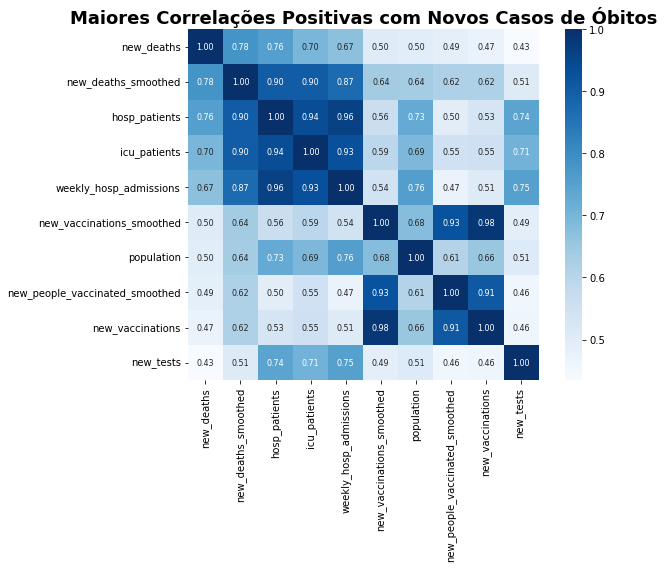

In [ ]:
# Criando uma matriz de correlação
df_corr = df.corr()

# Número de variáveis a serem selecionadas
k = 10

# Encontrando as variáveis mais correlacionadas com total_deaths
cols = df_corr.nlargest(k, 'new_deaths')['new_deaths'].index
cm = df[cols].corr()

# Plotando o heatmap
plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cmap='Blues', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Maiores Correlações Positivas com Novos Casos de Óbitos', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


#### **2.5 Países com Mais Casos Registrados de COVID-19**
O gráfico elaborado apresenta uma visualização concisa dos dez países que registraram os maiores números de casos de COVID-19. **Essas dez nações totalizam mais de 60% dos registros de indivíduos infectados pelo coronavírus.**

Abaixo, torna-se evidente a escala da propagação da pandemia em diferentes regiões do mundo.

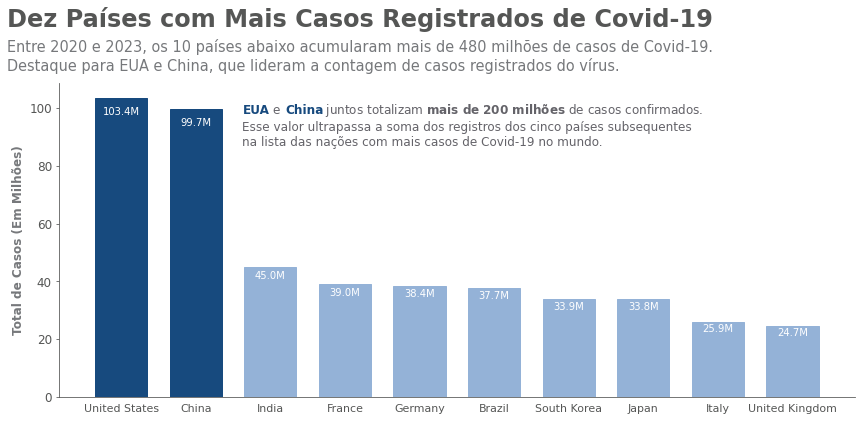

In [ ]:
# @title
# Agrupamento dos países com mais casos no total
top_countries_cases = df_new.groupby('location')['total_cases'].max().sort_values(ascending=False)[:10]
top_countries_cases = top_countries_cases.reset_index()
top_countries_cases.columns = ['País', 'Total Casos']
# display(top_countries_cases)

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Criar o gráfico de barras
bar_total_cases = ax.bar(top_countries_cases['País'], top_countries_cases['Total Casos'], color=AZUL1, width=0.7)

# Formatar os números sem notação científica
#ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Função para formatar valores em milhões
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}'

# Formatar eixo y para números em milhões
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Remover grid
ax.grid(False)

# Remover linhas
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Definir cores das linhas
ax.spines['bottom'].set_color(CINZA3)
ax.spines['left'].set_color(CINZA3)

# Configurar rótulos do eixo y
ax.set_ylabel('Total de Casos (Em Milhões)', color=CINZA5, fontsize=12, fontweight='bold')

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA3, labelsize=11)

# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=CINZA3, labelsize=12)

# Remover yticks do eixo y
ax.tick_params(bottom=False)

# Formatação dos rótulos de numeral completo para arredondado
def formatar_rotulo(valor):
    if valor >= 1_000_000:
        return f'{valor / 1_000_000:.1f}M'
    else:
        return str(valor)

# Adicionar rótulos de dados e cores destacadas
for i, rect in enumerate(bar_total_cases):
    height = rect.get_height()
    valor_formatado = formatar_rotulo(height)
    if i < 2:  # Destaque para barras dos EUA e China
        rect.set_color(AZUL1)  # Cor destaque
    else:
        rect.set_color(AZUL3)  # Cor padrão para outras barras

    # Rótulos de dados
    ax.text(rect.get_x() + rect.get_width() / 2,
            height / 1.03,
            valor_formatado,
            ha='center',
            va='top',
            color=BRANCO)

# Título
ax.text(-0.065, 1.18,'Dez Países com Mais Casos Registrados de COVID-19',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.065, 1.04,'Entre 2020 e 2023, os 10 países abaixo acumularam mais de'
                    ' 480 milhões de casos de COVID-19. \nDestaque para EUA e China,'
                    ' que lideram a contagem de casos registrados do vírus.',
        fontsize=14.5,
        color=CINZA5,
        transform=ax.transAxes)

# Legenda
ax.text(0.23, 0.80,'        e            juntos totalizam $\\bf mais \ de \ 200 \ milhões $'
                    ' de casos confirmados. \nEsse valor ultrapassa a soma dos registros '
                    'dos cinco países subsequentes \nna lista das nações com mais casos'
                    ' de COVID-19 no mundo.',
        fontsize=12,
        color=CINZA4,
        transform=ax.transAxes)

ax.text(0.231, 0.902,'EUA',
        fontsize=12,
        color=AZUL1,
        fontweight='bold',
        transform=ax.transAxes)

ax.text(0.285, 0.902,'China',
        fontsize=12,
        color=AZUL1,
        fontweight='bold',
        transform=ax.transAxes)

# Ajustar espaço entre os plots
plt.tight_layout()

# Apresentar o gráfico
plt.show()


Além disso, foi elaborado um gráfico dos dez países com mais casos registrados por milhão de habitantes, utilizando a variável `total_cases_per_million`. Comparar os países por essa coluna permite uma análise mais equitativa e contextualizada da propagação da COVID-19. Essa abordagem leva em consideração o tamanho da população de cada país, permitindo uma comparação mais precisa dos casos de COVID-19.

Isso ajuda a identificar quais países estão lidando proporcionalmente com um maior número de casos, independentemente do tamanho absoluto da população, e auxilia na formulação de estratégias de resposta e na alocação de recursos de saúde de maneira mais eficiente.

**Abaixo, destaca-se que somente a Coréia do Sul e a França figuram entre os dez países que apresentam os maiores registros de indivíduos infectados por milhão de habitantes, bem como registros totais na população.**





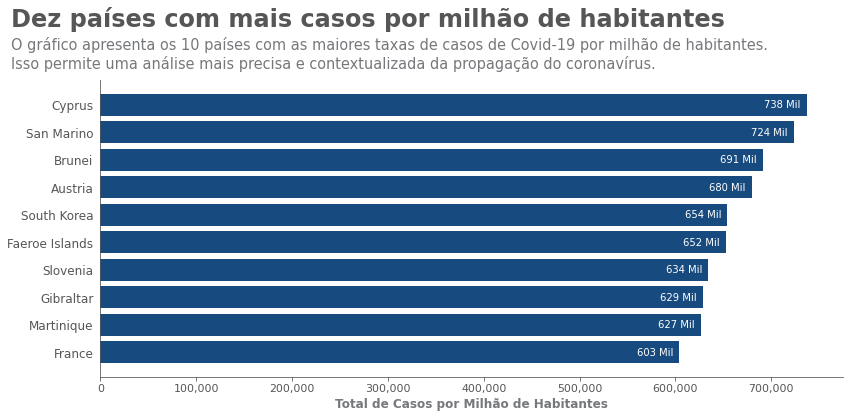

In [ ]:
# @title
# Agrupamento dos países com mais casos por milhão
top_countries_cases_per_million = df_new.groupby('location')['total_cases_per_million'].max().sort_values(ascending=False)[:10]
top_countries_cases_per_million = top_countries_cases_per_million.reset_index()
top_countries_cases_per_million.columns = ['País', 'Total de Casos por Milhão']

# Ordenar o DataFrame em ordem decrescente pelo valor 'Total de Casos por Milhão'
top_countries_cases_per_million = top_countries_cases_per_million.sort_values(by='Total de Casos por Milhão', ascending=True)

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Criar o gráfico de barras horizontais
bar_million_cases = ax.barh(top_countries_cases_per_million['País'], top_countries_cases_per_million['Total de Casos por Milhão'], color=AZUL1)

# Formatar os números sem notação científica
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Remover grid
ax.grid(False)

# Remover linhas
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Definir cores das linhas
ax.spines['bottom'].set_color(CINZA3)
ax.spines['left'].set_color(CINZA3)

# Configurar rótulos do eixo y
ax.set_xlabel('Total de Casos por Milhão de Habitantes', color=CINZA5, fontsize=12, fontweight='bold')

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA3, labelsize=11)

# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=CINZA3, labelsize=12)

# Remover ticks dos eixo y
ax.tick_params(left=False)

# Formatação dos rótulos de numeral completo para arredondado e milhares
def formatar_rotulo(valor):
    valor_arredondado = round(valor / 1000)
    return f'{valor_arredondado} Mil'

# Adicionar rótulos de dados formatados
for rect in bar_million_cases:
    width = rect.get_width()
    label = formatar_rotulo(width)
    ax.text(rect.get_x() + rect.get_width() / 1.01, rect.get_y() + rect.get_height() / 2,
            label, ha='right', va='center', color='white')

# Título
ax.text(-0.12, 1.18,'Dez países com mais casos por milhão de habitantes',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.12, 1.04,'O gráfico apresenta os 10 países com as maiores taxas de'
                      ' casos de COVID-19 por milhão de habitantes.\nIsso permite'
                      ' uma análise mais precisa e contextualizada da propagação do coronavírus.',
        fontsize=14.5,
        color=CINZA5,
        transform=ax.transAxes)

# Ajustar espaço entre os plots
plt.tight_layout()

# Apresentar o gráfico
plt.show()



#### **2.6 Evolução dos Casos Registrados da COVID-19 no Mundo**
O acompanhamento da evolução dos casos registrados da COVID-19 em escala global revela a trajetória dessa pandemia que afetou profundamente o mundo. No caso, foi utilizada a variável `new_cases` para verificar o registro diário ao longo dos anos.

Abaixo, nota-se que houveram picos no início e final de 2022. Algumas possibilidades para esse alto contágio no começo desse ano são:

 - O surgimento de novas variantes do vírus: As variantes Delta e Ômicron, que surgiram em 2021 e 2022, respectivamente, são mais contagiosas do que as variantes anteriores do SARS-CoV-2, o vírus que causa a COVID-19. Isso significa que elas podem se espalhar mais rapidamente e causar mais infecções.

 - O relaxamento das medidas de controle da pandemia: No começo de 2022, muitos países começaram a relaxar as medidas de controle da pandemia, como o uso de máscaras, o distanciamento social e as restrições de viagem. Isso pode ter contribuído para o aumento da transmissão do vírus.

 - A baixa taxa de vacinação em alguns países: Alguns países ainda possuíam uma baixa taxa de vacinação contra a COVID-19. Isso deixou as pessoas mais vulneráveis à infecção e à doença grave.

Em relação ao final do ano de 2022, China apresentou um pico de casos de COVID-19, com mais de 7 milhões de novos casos registrados por dia. A China foi um dos últimos países a ser atingido pela variante Ômicron e apresentou dificuldades em conter essa variante na população.


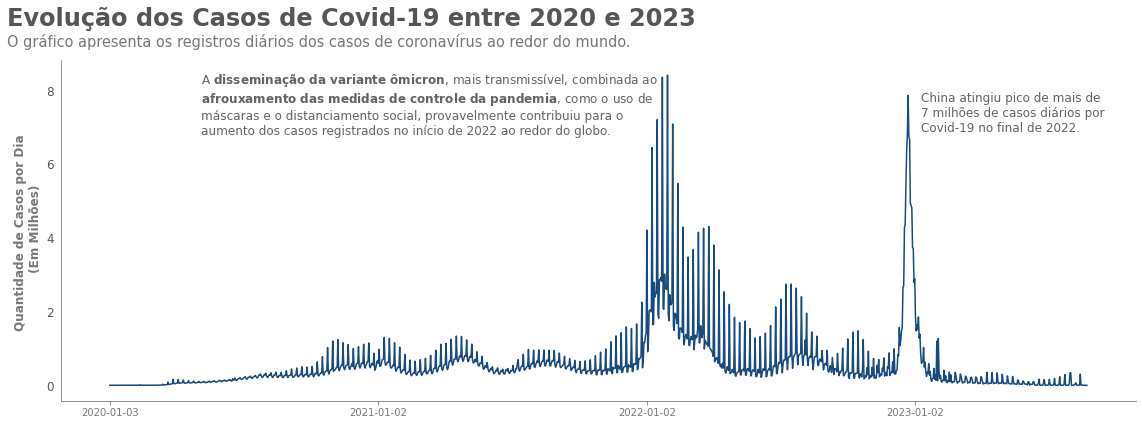

In [ ]:
# @title
# Filtrar os dados para os novos casos no mundo
world_new_cases = df_owid.loc[df_owid.location == "World", ["date", "new_cases"]]

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(16, 6), dpi=72)

# Criar o gráfico de linha
ax.plot(world_new_cases["date"], world_new_cases["new_cases"], color=AZUL1)

# Formatar eixo y para números sem notação científica
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=True))
ax.ticklabel_format(style='plain', axis='y')  # Forçar formato de número

# Função para formatar valores em milhões
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}'

# Formatar eixo y para números em milhões
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Definir os anos como ticks no eixo x
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(world_new_cases["date"][::365])  # A cada 365 dias (um ano)

# Remover grid
ax.grid(False)

# Remover linhas
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Definir cores das linhas
ax.spines['left'].set_color(CINZA5)
ax.spines['bottom'].set_color(CINZA5)

# Configurar rótulos do eixo y
ax.set_ylabel('Quantidade de Casos por Dia \n (Em Milhões)', color=CINZA5, fontsize=12, fontweight='bold')

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA5, labelsize=10)

# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=CINZA3, labelsize=12)

# Remover yticks do eixo y
ax.tick_params(left=False)

# Título / Subtítulo / Legendas
ax.text(-0.05, 1.1,'Evolução dos Casos de COVID-19 entre 2020 e 2023',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.05, 1.04,'O gráfico apresenta os registros diários dos casos de '
                    'coronavírus ao redor do mundo.',
        fontsize=14.5,
        color=CINZA5,
        transform=ax.transAxes)

# Legendas
ax.text(0.13, 0.78,'A $\\bf disseminação \ da \ variante \ ômicron $, mais transmissível, '
                      'combinada ao \n$\\bf afrouxamento \ das \ medidas \ de \ controle \ da $ '
                      '$\\bf pandemia $, '
                      'como o uso de\nmáscaras e o distanciamento social, '
                      'provavelmente contribuiu para o \naumento dos casos '
                      'registrados no início de 2022 ao redor do globo.',
        fontsize=12,
        color=CINZA4,
        transform=ax.transAxes)

ax.text(0.8, 0.79,'China atingiu pico de mais de '
                    '\n7 milhões de casos diários por '
                    '\nCOVID-19 no final de 2022.',
        fontsize=12,
        color=CINZA4,
        transform=ax.transAxes)

# Ajustar espaço entre os plots
plt.tight_layout()

# Exibir o gráfico
plt.show()


#### **2.7 Países com Mais Óbitos devido à COVID-19**
O gráfico abaixo apresenta os países com os mais altos números de óbitos devido à COVID-19. **Nesse contexto, é impossível ignorar a magnitude da tragédia que a pandemia deixou no planeta. Essa visualização nos leva a refletir sobre a importância de medidas de prevenção, solidariedade e a busca incessante por soluções para evitar mais perdas.**

Nos EUA, mais de um milhão de vidas foram perdidas pelo coronavírus. Além disso, destaca-se que o Brasil ocupa o segundo lugar em número de registros de mortes, embora esteja na sexta posição em casos no mundo. Ao comparar os números, nota-se que a Alemanha e o Brasil apresentam quantidades similares de casos de COVID-19, com 38,4 milhões e 37,7 milhões, respectivamente. No entanto, a diferença crucial surge no registro de óbitos: a Alemanha possui um índice quatro vezes menor que o do Brasil.

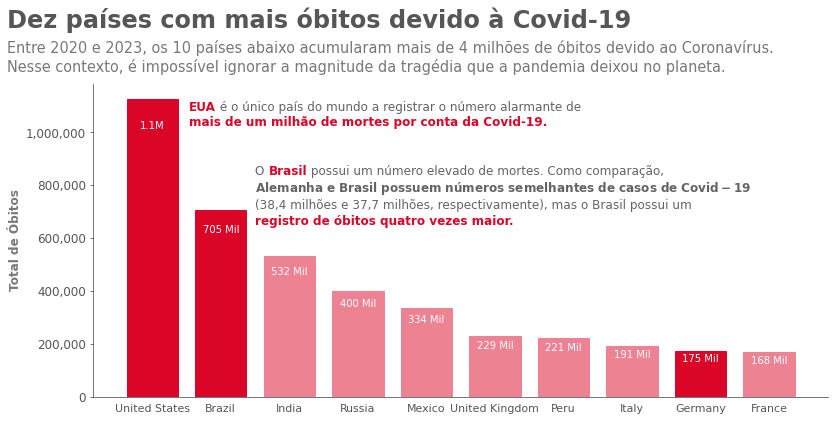

In [ ]:
# @title
# Filtrar os países com mais casos
top_countries_deaths = df_new.groupby('location')['total_deaths'].max().sort_values(ascending=False)[:10]
top_countries_deaths = top_countries_deaths.reset_index()
top_countries_deaths.columns = ['País', 'Total Mortes']
# display(top_countries_deaths)

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Criar o gráfico de barras
bar_total_deaths = ax.bar(top_countries_deaths['País'], top_countries_deaths['Total Mortes'], color=AZUL1, width=0.75)

# Formatar os números sem notação científica
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Remover grid
ax.grid(False)

# Remover linhas
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Definir cores das linhas
ax.spines['bottom'].set_color(CINZA3)
ax.spines['left'].set_color(CINZA3)

# Configurar rótulos do eixo y
ax.set_ylabel('Total de Óbitos', color=CINZA5, fontsize=12, fontweight='bold')

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA3, labelsize=11)

# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=CINZA3, labelsize=12)

# Remover yticks do eixo y
ax.tick_params(bottom=False)

# Formatação dos rótulos de numeral completo para arredondado
def formatar_rotulo(valor):
    if valor >= 1_000_000:
        return f'{valor / 1_000_000:.1f}M'
    else:
        valor_arredondado = round(valor / 1000)
        return f'{valor_arredondado:.0f} Mil'


# Adicionar rótulos de dados e cores destacadas
for i, rect in enumerate(bar_total_deaths):
    height = rect.get_height()
    valor_formatado = formatar_rotulo(height)
    if i < 2:  # Destaque para barras dos EUA e Brasil
        rect.set_color(VERMELHO1)  # Cor destaque
    elif i == 8:
      rect.set_color(VERMELHO1)  # Cor destaque
    else:
        rect.set_color(VERMELHO3)  # Cor padrão para outras barras

    # Rótulos de dados
    ax.text(rect.get_x() + rect.get_width() / 2,
            height / 1.08,
            valor_formatado,
            ha='center',
            va='top',
            color=BRANCO)

# Título
ax.text(-0.117, 1.18,'Dez países com mais óbitos devido à COVID-19',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.117, 1.04,'Entre 2020 e 2023, os 10 países abaixo acumularam mais de'
                    ' 4 milhões de óbitos devido ao Coronavírus. \nNesse contexto, '
                    'é impossível ignorar a magnitude da tragédia que a pandemia deixou no planeta.',
        fontsize=14.5,
        color=CINZA5,
        transform=ax.transAxes)

# Legenda
ax.text(0.167, 0.865,' é o único país do mundo a registrar o número alarmante de\n',
        fontsize=12,
        color=CINZA4,
        transform=ax.transAxes)

ax.text(0.13, 0.914,'EUA',
        fontsize=12,
        color=VERMELHO1,
        fontweight='bold',
        transform=ax.transAxes)

ax.text(0.13, 0.865, 'mais de um milhão de mortes por conta da COVID-19.',
        fontsize=12,
        color=VERMELHO1,
        fontweight='bold',
        transform=ax.transAxes)

ax.text(0.22, 0.6,'O            possui um número elevado de mortes. Como comparação,\n'
                    '$\\bf Alemanha \ e \ Brasil \ possuem \ números \ semelhantes '
                    '\ de \ casos \ de \ COVID-19 $\n'
                    '(38,4 milhões e 37,7 milhões, respectivamente), mas o Brasil possui um',
        fontsize=12,
        color=CINZA4,
        transform=ax.transAxes)


ax.text(0.22, 0.55,'registro de óbitos quatro vezes maior.',
        fontsize=12,
        color=VERMELHO1,
        fontweight='bold',
        transform=ax.transAxes)


ax.text(0.239, 0.708,'Brasil',
        fontsize=12,
        color=VERMELHO1,
        fontweight='bold',
        transform=ax.transAxes)

# Ajustar espaço entre os plots
plt.tight_layout()

# Apresentar o gráfico
plt.show()



Ademais, como foi realizado com os casos, o gráfico abaixou verificou as mortes por cada milhão de habitantes por meio da coluna `total_deaths_per_million`. Essa abordagem leva em consideração a densidade populacional de cada nação, permitindo uma avaliação mais precisa da letalidade do vírus.

Ao calcular as mortes por milhão de habitantes, pode-se identificar regiões com maiores taxas de mortalidade, entender a eficácia das medidas de saúde pública e direcionar recursos para áreas mais necessitadas. Além disso, essa métrica ajuda a evitar distorções nos dados devido às disparidades populacionais, proporcionando uma visão mais equilibrada do impacto da pandemia em diferentes países.

Abaixo, é evidente que o Peru enfrentou o maior impacto em termos de número de óbitos dentro de sua população.

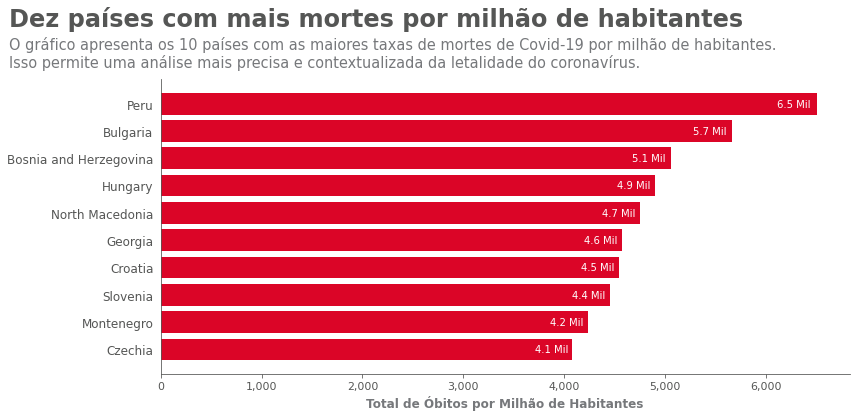

In [ ]:
# @title
# Filtrar os países com mais mortes por milhão
top_countries_deaths_per_million = df_new.groupby('location')['total_deaths_per_million'].max().sort_values(ascending=False)[:10]
top_countries_deaths_per_million = top_countries_deaths_per_million.reset_index()
top_countries_deaths_per_million.columns = ['País', 'Total de Mortes por Milhão']

# Ordenar o DataFrame em ordem decrescente pelo valor 'Total de Mortes por Milhão'
top_countries_deaths_per_million = top_countries_deaths_per_million.sort_values(by='Total de Mortes por Milhão', ascending=True)

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 6))

# Criar o gráfico de barras
bar_total_deaths = ax.barh(top_countries_deaths_per_million['País'], top_countries_deaths_per_million['Total de Mortes por Milhão'], color=VERMELHO1)

# Formatar os números sem notação científica
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Remover grid
ax.grid(False)

# Remover linhas
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Definir cores das linhas
ax.spines['bottom'].set_color(CINZA3)
ax.spines['left'].set_color(CINZA3)

# Configurar rótulos do eixo y
ax.set_xlabel('Total de Óbitos por Milhão de Habitantes', color=CINZA5, fontsize=12, fontweight='bold')

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA3, labelsize=11)

# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=CINZA3, labelsize=12)

# Remover ticks dos eixo y
ax.tick_params(left=False)

# Formatação dos rótulos de numeral completo para arredondado e milhares
def formatar_rotulo(valor):
    rotulo = valor / 1000
    return f'{rotulo:.1f} Mil'

# Adicionar rótulos de dados formatados
for rect in bar_total_deaths:
    width = rect.get_width()
    label = formatar_rotulo(width)
    ax.text(rect.get_x() + rect.get_width() / 1.01, rect.get_y() + rect.get_height() / 2,
            label, ha='right', va='center', color='white')

# Título
ax.text(-0.22, 1.18,'Dez países com mais mortes por milhão de habitantes',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.22, 1.04,'O gráfico apresenta os 10 países com as maiores taxas de'
                      ' mortes de COVID-19 por milhão de habitantes.\nIsso permite'
                      ' uma análise mais precisa e contextualizada da letalidade do coronavírus.',
        fontsize=14.5,
        color=CINZA5,
        transform=ax.transAxes)

# Ajustar espaço entre os plots
plt.tight_layout()

# Apresentar o gráfico
plt.show()




#### **2.8 Evolução dos Óbitos devido à COVID-19 no Mundo**
O gráfico mostra a evolução dos óbitos devido à COVID-19 no mundo, desde o início da pandemia até o presente momento.

O gráfico revela que o número de óbitos aumentou rapidamente no início da pandemia, atingindo um pico de mais de 20 mil mortes por dia em janeiro de 2021. A partir de então, o número de óbitos começou a diminuir, mas ainda permaneceu em um nível elevado. Apenas após quase metade de 2022 que o número de óbitos registrados por dia baixou consideravelmente.

Até o momento, aproximadamente 7 milhões de pessoas morreram devido à COVID-19 no mundo.

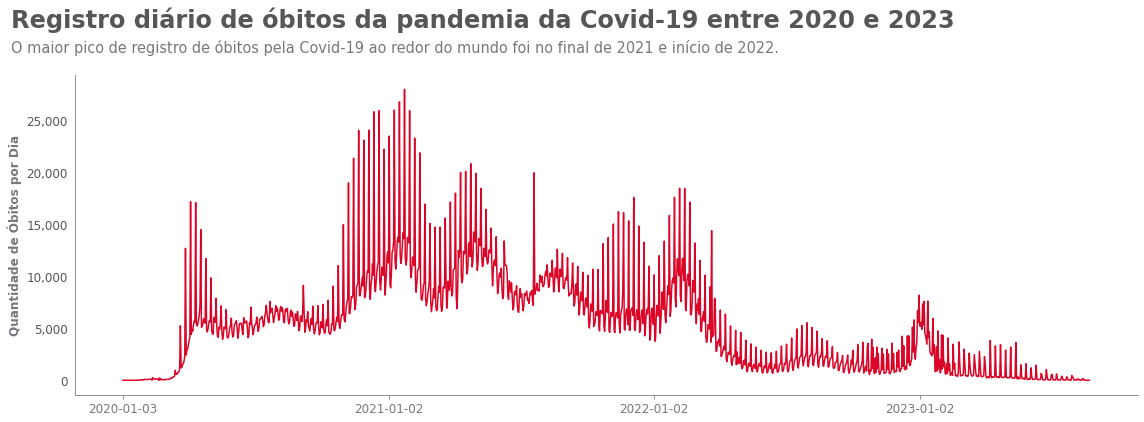

In [ ]:
# @title
# Filtrar os dados para as novas mortes no mundo
world_new_deaths = df_owid.loc[df.location == "World", ["date", "new_deaths"]]

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(16, 6), dpi=72)

# Criar o gráfico de linha
ax.plot(world_new_deaths["date"], world_new_deaths["new_deaths"], linestyle='-', color=VERMELHO1)

# Definir os anos como ticks no eixo x
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(world_new_cases["date"][::365])  # A cada 365 dias (um ano)

# Formatar os números sem notação científica
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Remover grid
ax.grid(False)

# Remover linhas
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Definir cores das linhas
ax.spines['left'].set_color(CINZA5)
ax.spines['bottom'].set_color(CINZA5)

# Configurar rótulos do eixo y
ax.set_ylabel('Quantidade de Óbitos por Dia', color=CINZA5, fontsize=12, fontweight='bold')

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA5, labelsize=12)

# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=CINZA3, labelsize=12)

# Remover yticks do eixo y
ax.tick_params(left=False)

# Título
ax.text(-0.06, 1.15,'Registro diário de óbitos da pandemia da COVID-19 entre 2020 e 2023',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.06, 1.07,'O maior pico de registro de óbitos pela COVID-19 ao '
                    'redor do mundo foi no final de 2021 e início de 2022.',
        fontsize=14.5,
        color=CINZA5,
        transform=ax.transAxes)

# Ajustar espaço entre os plots
plt.tight_layout()

# Exibir o gráfico
plt.show()


### **3. Análise de Casos e Óbitos no Brasil**



Após enfocar nos acontecimentos no mundo, essa parte do projeto terá como foco o Brasil.

O Brasil foi um dos países mais afetados pela pandemia da COVID-19, a qual ocasionou um impacto significativo na saúde pública, na economia e na sociedade em geral. A pandemia chegou à nação brasileira em março de 2020 e, desde então, o país registrou [**mais de 37 milhões de casos** e mais de **700 mil mortes pela doença**](https://covid19.who.int/region/amro/country/br).

Abaixo, foi criado um DataFrame para o Brasil utilizando o código 'BRA' da coluna `iso_code`.



In [ ]:
# Criar uma cópia do DataFrame apenas com o Brasil
df_brazil = df.loc[df.iso_code == "BRA"].copy()

display(df_brazil)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
39889,BRA,South America,Brazil,2020-01-03,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN
39890,BRA,South America,Brazil,2020-01-04,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN
39891,BRA,South America,Brazil,2020-01-05,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN
39892,BRA,South America,Brazil,2020-01-06,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN
39893,BRA,South America,Brazil,2020-01-07,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41213,BRA,South America,Brazil,2023-08-19,37717062.00,0.00,0.00,704659.00,0.00,0.00,175172.77,0.00,0.00,3272.71,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN
41214,BRA,South America,Brazil,2023-08-20,37717062.00,0.00,0.00,704659.00,0.00,0.00,175172.77,0.00,0.00,3272.71,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.

#### **3.1 Identificação do Primeiro Caso e Primeira Morte**

Abaixo, nota-se que o primeiro caso registrado no Brasil foi no dia 27/02/2020, quase dois meses depois do primeiro caso registrado de COVID-19 na China.

In [ ]:
# Identificando o primeiro caso
df_brazil.loc[df_brazil['new_cases'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
39944,BRA,South America,Brazil,2020-02-27,1.00,1.00,0.14,NaN,0.00,0.00,0.01,0.01,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN


A primeira morte foi identificada cerca de 20 dias após o primeiro caso de COVID-19, quando 291 casos já haviam sido registrados no país.

In [ ]:
# Identificando a primeira morte
df_brazil.loc[df_brazil['new_deaths'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
39965,BRA,South America,Brazil,2020-03-19,291.00,57.00,36.71,1.00,1.00,0.14,1.35,0.27,0.17,0.01,0.01,0.00,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.20,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN


#### **3.2 Valores Estatísticos**

Abaixo, foi utilizado novamente o método `.describe()`. O resumo estatístico teve enfoque nas variáveis `new_cases` e `new_deaths`.

**Média e Desvio Padrão:**
 - O Brasil teve uma média de aproximadamente 28 mil novos casos de COVID-19 por dia, com uma considerável variação diária, representada pelo desvio padrão de mais de 33 mil. Isso sugere que houve momentos de picos significativos de novos casos, além de períodos com menor incidência.
 - Em média, o Brasil registrou cerca de 530 novas mortes por dia devido à COVID-19. Assim como nos novos casos, também houve uma variação substancial nas mortes diárias, indicada pelo desvio padrão de mais de 700 óbitos. Isso destaca que o país enfrentou períodos com aumento significativo no número de óbitos.

**Picos de Casos e Óbitos**
 - Os valores máximos registrados de quase 300 mil novos casos e mais de 4000 novas mortes indicam picos extremos em determinados momentos da pandemia no Brasil. Esses picos podem estar associados a surtos agudos da doença, pressionando o sistema de saúde e as medidas de controle (pode ser verificado logo abaixo).

**Média e Mediana**
  - Observa-se uma notável discrepância entre a mediana e a média no resumo estatístico para as duas variáveis. Essa diferença sugere a presença de *outliers*, ou seja, valores atípicos no dataset. Esses dados incomuns podem representar picos significativos de incidência de COVID-19 em determinados períodos. Apesar dessa variação acentuada, tanto a mediana quanto a média indicam que o Brasil enfrentou altos números de novos casos e novas mortes registradas ao longo do tempo.

In [ ]:
df_brazil[["new_cases", "new_deaths"]].describe().T

,count,mean,std,min,25%,50%,75%,max
new_cases,1328.00,28401.83,33436.87,0.00,3791.50,18596.50,41869.25,298408.00
new_deaths,1329.00,530.22,706.22,0.00,43.00,239.00,793.00,4249.00


Abaixo, pode-se verificar os dias que apresentaram mais de 200 mil casos novos registrados, todos no primeiro semestre de 2022.

In [ ]:
df_brazil.query('new_cases > 200000')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
40638,BRA,South America,Brazil,2022-01-21,23416748.00,204854.00,100093.86,621855.00,338.00,212.00,108756.52,951.42,464.88,2888.14,1.57,0.98,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35018.00,0.16,NaN,NaN,tests performed,351485976.00,167875050.00,148225622.00,40368648.00,856708.00,1642430.00,163.24,77.97,68.84,18.75,7628.00,143529.00,0.07,38.44,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN
40645,BRA,South America,Brazil,2022-01-28,24535884.00,224567.00,159876.57,624413.00,570.00,365.43,113954.23,1042.98,742.53,2900.02,2.65,1.70,1.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77430.00,0.36,NaN,NaN,tests performed,360492730.00,169619416.00,149714068.00,46174206.00,1702800.00,1286679.00,167.43,78.78,69.53,21.45,5976.00,249195.00,0.12,34.49,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN
40646,BRA,South America,Brazil,2022-01-29,24764838.00,228954.00,168513.57,625085.00,672.00,411.43,115017.58,1063.35,782.64,2903.14,3.12,1.91,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76544.00,0.36,NaN,NaN,tests performed,361165196.00,169825847.00,149779557.00,46576117.00,672466.00,1202899.00,167.74,78.87,69.56,21.63,5587.00,258724.00,0.12,34.48,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN
40647,BRA,South America,Brazil,2022-01-30,25034806.00,269968.00,183289.14,625884.00,799.00,474.43,116271.42,1253.84,851.27,2906.85,3.71,2.20,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75657.00,0.35,NaN,NaN,tests performed,361309679.00,169865538.00,149793528.00,46667050.00,144483.00,1193924.00,167.81,78.89,69.57,21.67,5545.00,253523.00,0.12,34.48,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN
40653,BRA,South America,Brazil,2022-02-05,26091520.00,298408.00,189526.00,630001.00,1041.00,702.29,121179.21,1385.92,880.23,2925.97,4.83,3.26,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71686.00,0.33,NaN,NaN,tests performed,368572365.00,172107474.00,150764876.00,50739982.00,794154.00,1058167.00,171.18,79.93,70.02,23.57,4915.00,325947.00,0.15,34.39,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN


Dois momentos críticos marcaram os picos mais intensos de óbitos relacionados à COVID-19 no Brasil. Ambos ocorreram durante o primeiro semestre de 2021, período em que o país confrontou os mais elevados índices de fatalidades decorrentes da doença.

In [ ]:
df_brazil.query('new_deaths> 4000')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
40350,BRA,South America,Brazil,2021-04-08,13100580.00,86979.00,63210.14,336947.00,4195.00,2757.29,60844.21,403.96,293.57,1564.91,19.48,12.81,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42676465.00,84650.00,199.12,0.40,72535.00,0.34,NaN,NaN,tests performed,28653848.00,22246612.00,6407236.00,NaN,1009769.00,681863.00,13.31,10.33,2.98,NaN,3167.00,515369.00,0.24,70.83,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN
40352,BRA,South America,Brazil,2021-04-10,13279857.00,86652.00,62859.00,345025.00,4249.00,2820.14,61676.84,402.45,291.94,1602.43,19.73,13.10,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77124.00,0.36,NaN,NaN,tests performed,30084664.00,23097172.00,6987492.00,NaN,540086.00,787028.00,13.97,10.73,3.25,NaN,3655.00,553547.00,0.26,70.83,25.04,33.50,8.55,5.06,14103.45,3.40,177.96,8.11,10.10,17.90,NaN,2.20,75.88,0.77,215313504.00,NaN,NaN,NaN,NaN


#### **3.3 Quantidade Total de Casos e Óbitos de COVID-19 no Brasil entre 2020 e 2023**
A pandemia teve um impacto significativo na saúde pública brasileira, com mais de 700.000 mortes e mais de 37 milhões de casos registrados.

O ano de 2020 registrou um volume significativo de casos e mortes, marcando o início do impacto da doença. No entanto, 2021 foi o ano mais letal, em que o número de casos identificados e óbitos dobrou comparadado ao período anual anterior. Isso pode ser atribuído à propagação mais rápida da variante Delta do vírus.

No decorrer do ano de 2022, apesar dos casos identificados permanecerem semelhantes aos números de 2021, observou-se uma queda no número total de mortes. Essa diminuição pode ser atribuída a um aumento da cobertura vacinal e a medidas de saúde pública mais rigorosas.

Em 2023, a [OMS declarou o fim da Emergência de Saúde Pública de Importância Internacional referente à COVID-19](https://www.paho.org/pt/noticias/5-5-2023-oms-declara-fim-da-emergencia-saude-publica-importancia-internacional-referente). Nesse mesmo ano, observou-se uma acentuada redução tanto no número de mortes quanto de casos. Apesar desse cenário, é essencial manter a vigilância e precaução diante da contínua evolução da situação.



In [ ]:
# @title
# Agrupar por ano e pegar a última linha de cada grupo
death_cases_year_diff = df_brazil.groupby(df_brazil['date'].dt.year).last()

# Selecionar apenas as colunas de interesse
death_cases_year_diff = death_cases_year_diff[['total_deaths', 'total_cases']]

# Calcular a diferença entre os anos
death_cases_year_diff['diff_total_deaths'] = death_cases_year_diff['total_deaths'].diff()
death_cases_year_diff['diff_total_cases'] = death_cases_year_diff['total_cases'].diff()

# Manter o valor da primeira linha (2020) igual ao total
death_cases_year_diff['diff_total_deaths'].iloc[0] = death_cases_year_diff['total_deaths'].iloc[0]
death_cases_year_diff['diff_total_cases'].iloc[0] = death_cases_year_diff['total_cases'].iloc[0]

# Formatar valores com milhares e sem casas decimais
format_func = lambda x: '{:,.0f}'.format(x).replace(',', '.')

# Aplicar a função de formatação para as colunas de diferença
death_cases_year_diff[['diff_total_deaths', 'diff_total_cases']] = death_cases_year_diff[['diff_total_deaths', 'diff_total_cases']].applymap(format_func)

# Renomear o índice para 'year' e exibir o DataFrame
last_columns = death_cases_year_diff[['diff_total_deaths', 'diff_total_cases']]
last_columns.index.name = 'Ano'
last_columns.columns = ['Mortes por Ano', 'Casos por Ano']
last_columns

,Mortes por Ano,Casos por Ano
Ano,,
2020,192.681,7.563.551
2021,426.136,14.700.283
2022,74.917,14.038.581
2023,10.925,1.414.647


#### **3.4 Evolução dos Casos Registrados da COVID-19 no Brasil**
Ao observar a trajetória da COVID-19 no Brasil, é possível identificar como a disseminação da doença evoluiu ao longo do tempo.

O gráfico mostra que o número de casos de COVID-19 no Brasil aumentou rapidamente no início da pandemia, atingindo um pico de mais de 290.000 novos casos registrados no início de 2022.

Ademais, o gráfico também revela que o número de casos de COVID-19 no Brasil é muito variável. Há dias com um número muito alto de casos e dias com um número muito baixo de casos. Essa variabilidade pode ser devido a uma variedade de fatores, como a introdução de novas variantes do vírus, mudanças nas medidas de saúde pública e mudanças no comportamento das pessoas.

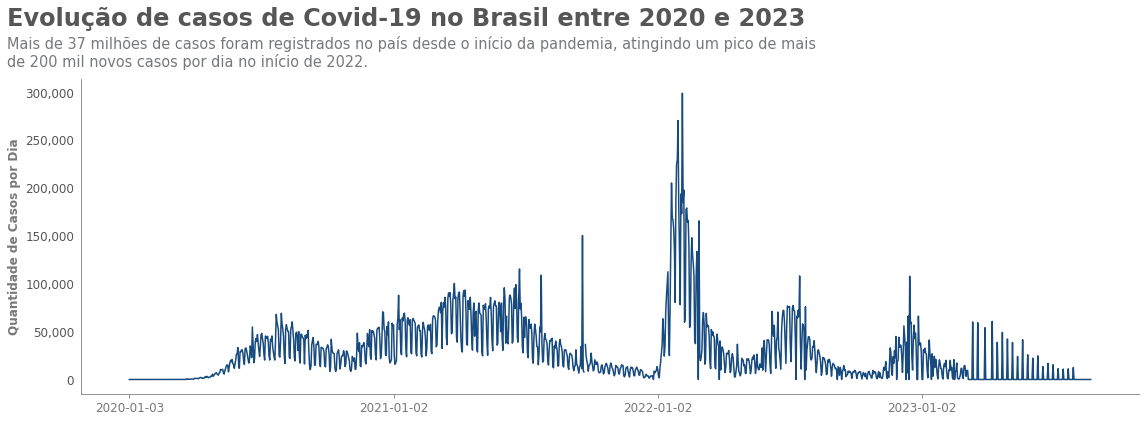

In [ ]:
# @title
# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(16, 6), dpi=72)

# Criar o gráfico de linha
ax.plot(df_brazil["date"], df_brazil["new_cases"], linestyle='-', color=AZUL1)

# Definir os anos como ticks no eixo x
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(world_new_cases["date"][::365])  # A cada 365 dias (um ano)

# Formatar os números sem notação científica
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Remover grid
ax.grid(False)

# Remover linhas
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Definir cores das linhas
ax.spines['left'].set_color(CINZA5)
ax.spines['bottom'].set_color(CINZA5)

# Configurar rótulos do eixo y
ax.set_ylabel('Quantidade de Casos por Dia', color=CINZA5, fontsize=12, fontweight='bold')

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA5, labelsize=12)

# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=CINZA3, labelsize=12)

# Remover yticks do eixo y
ax.tick_params(left=False)

# Título
ax.text(-0.07, 1.17,'Evolução de casos de COVID-19 no Brasil entre 2020 e 2023',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.07, 1.04,'Mais de 37 milhões de casos foram registrados no país desde o início da pandemia, '
                    'atingindo um pico de mais \nde 200 mil novos casos '
                    'por dia no início de 2022.',
        fontsize=14.5,
        color=CINZA5,
        transform=ax.transAxes)

# Ajustar espaço entre os plots
plt.tight_layout()

# Exibir o gráfico
plt.show()


#### **3.5 Evolução dos Óbitos devido à COVID-19 no Brasil**
Abaixo há a evolução dos óbitos devido à COVID-19 no Brasil ao longo do tempo.

O gráfico mostra que o número de óbitos devido à COVID-19 no Brasil aumentou rapidamente no início da pandemia, atingindo um pico de mais de 4.000 óbitos em um único dia no primeiro semestre de 2021. Apesar de ter continuado alto, o número de óbitos começou a diminuir após o segundo semestre de 2021.

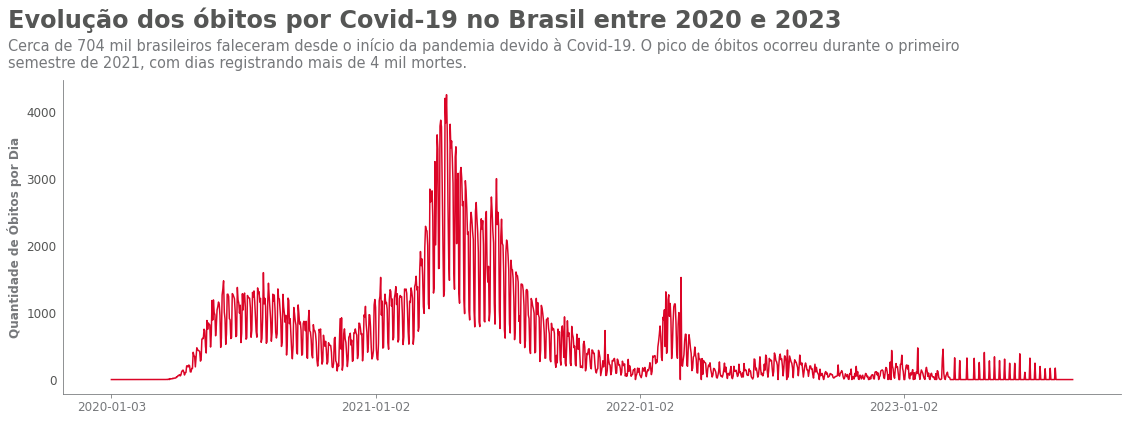

In [ ]:
# @title
# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(16, 6), dpi=72)

# Criar o gráfico de linha
ax.plot(df_brazil["date"], df_brazil["new_deaths"], linestyle='-', color=VERMELHO1)

# Definir os anos como ticks no eixo x
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(world_new_cases["date"][::365])  # A cada 365 dias (um ano)

# Remover grid
ax.grid(False)

# Remover linhas
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Definir cores das linhas
ax.spines['left'].set_color(CINZA5)
ax.spines['bottom'].set_color(CINZA5)

# Configurar rótulos do eixo y
ax.set_ylabel('Quantidade de Óbitos por Dia', color=CINZA5, fontsize=12, fontweight='bold')

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=CINZA5, labelsize=12)

# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=CINZA3, labelsize=12)

# Remover yticks do eixo y
ax.tick_params(left=False)

# Título / Subtítulo / Legendas
ax.text(-0.052, 1.17,'Evolução dos óbitos por COVID-19 no Brasil entre 2020 e 2023',
        fontsize=24,
        color=CINZA3,
        fontweight='bold',
        transform=ax.transAxes)

# Subtítulo
ax.text(-0.052, 1.04,'Cerca de 704 mil brasileiros faleceram desde o início da pandemia devido à COVID-19. '
                    'O pico de óbitos ocorreu durante o primeiro \nsemestre de 2021, '
                    'com dias registrando mais de 4 mil mortes.',
        fontsize=14.5,
        color=CINZA5,
        transform=ax.transAxes)

# Ajustar espaço entre os plots
plt.tight_layout()

# Exibir o gráfico
plt.show()


---
## Considerações Finais
---


A pandemia da COVID-19 foi um evento global devastador que causou milhões de mortes e adoecimentos em todo o mundo. De fato, essa crise sanitária teve um impacto significativo na economia mundial, levando ao fechamento de empresas, perda de empregos e aumento da pobreza em diversas regiões do globo. Além disso, essa doença também teve um impacto significativo na vida social das pessoas, levando ao isolamento, à ansiedade e à depressão.

Neste projeto, foi utilizado um dataset do Our World in Data, que contém dados de casos e óbitos por COVID-19 de todo o mundo. Com base na análise dos dados, foi possível verificar que:

- As dez nações que registraram os maiores números de casos de COVID-19 totalizaram mais de 60% dos registros de indivíduos infectados pelo coronavírus no mundo.
- Nos EUA, mais de um milhão de vidas foram perdidas pelo coronavírus.
- O ano de 2021 foi o mais letal em relação ao coronavírus.
- O Brasil também apresentou um número alarmante de casos e óbitos devido à COVID-19.
- Devido à complexidade na obtenção precisa dos números de casos e mortes relacionados à COVID-19, é possível que tenha ocorrido uma subnotificação de falecimentos causados pela doença.

É importante ressaltar que a análise não seria possível sem a qualidade e confiabilidade dos dados providos pelo Our World in Data. Esse dataset possui diversas informações a serem exploradas, de modo a obter uma compreensão mais completa do impacto da COVID-19. Como exemplo, pode ser realizada a **análise detalhada da vacinação e suas relações com os casos registrados e óbitos**, além de expandir as comparações entre países e continentes, examinando diferentes estratégias de controle e suas consequências.

Por fim, é necessário ressaltar que cada número representa uma história, uma família e um ente querido perdido para esse vírus implacável. É um lembrete tangível de como a COVID-19 transcendeu as fronteiras e afetou a vida de tantas pessoas ao redor do mundo.

No entanto, por um lado, a pandemia testou a capacidade humana de adaptação e solidariedade. E é por meio desse espírito que os seres humanos devem continuar a superar as adversidades e a trilhar um caminho rumo à recuperação.

<center><img alt="COVID-19" width="50%" src="https://conteudo.imguol.com.br/c/entretenimento/b3/2022/04/04/pandemia-coronavirus-1649099360799_v2_900x506.jpg"></center>

---





